#  need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



import warnings 
warnings.filterwarnings('ignore')

In [74]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [75]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [76]:
data.shape

(158, 12)

In [77]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [78]:
# droping Unwanted columns
data=data.drop(columns=['Standard Error','Happiness Rank','Country','Region'])
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


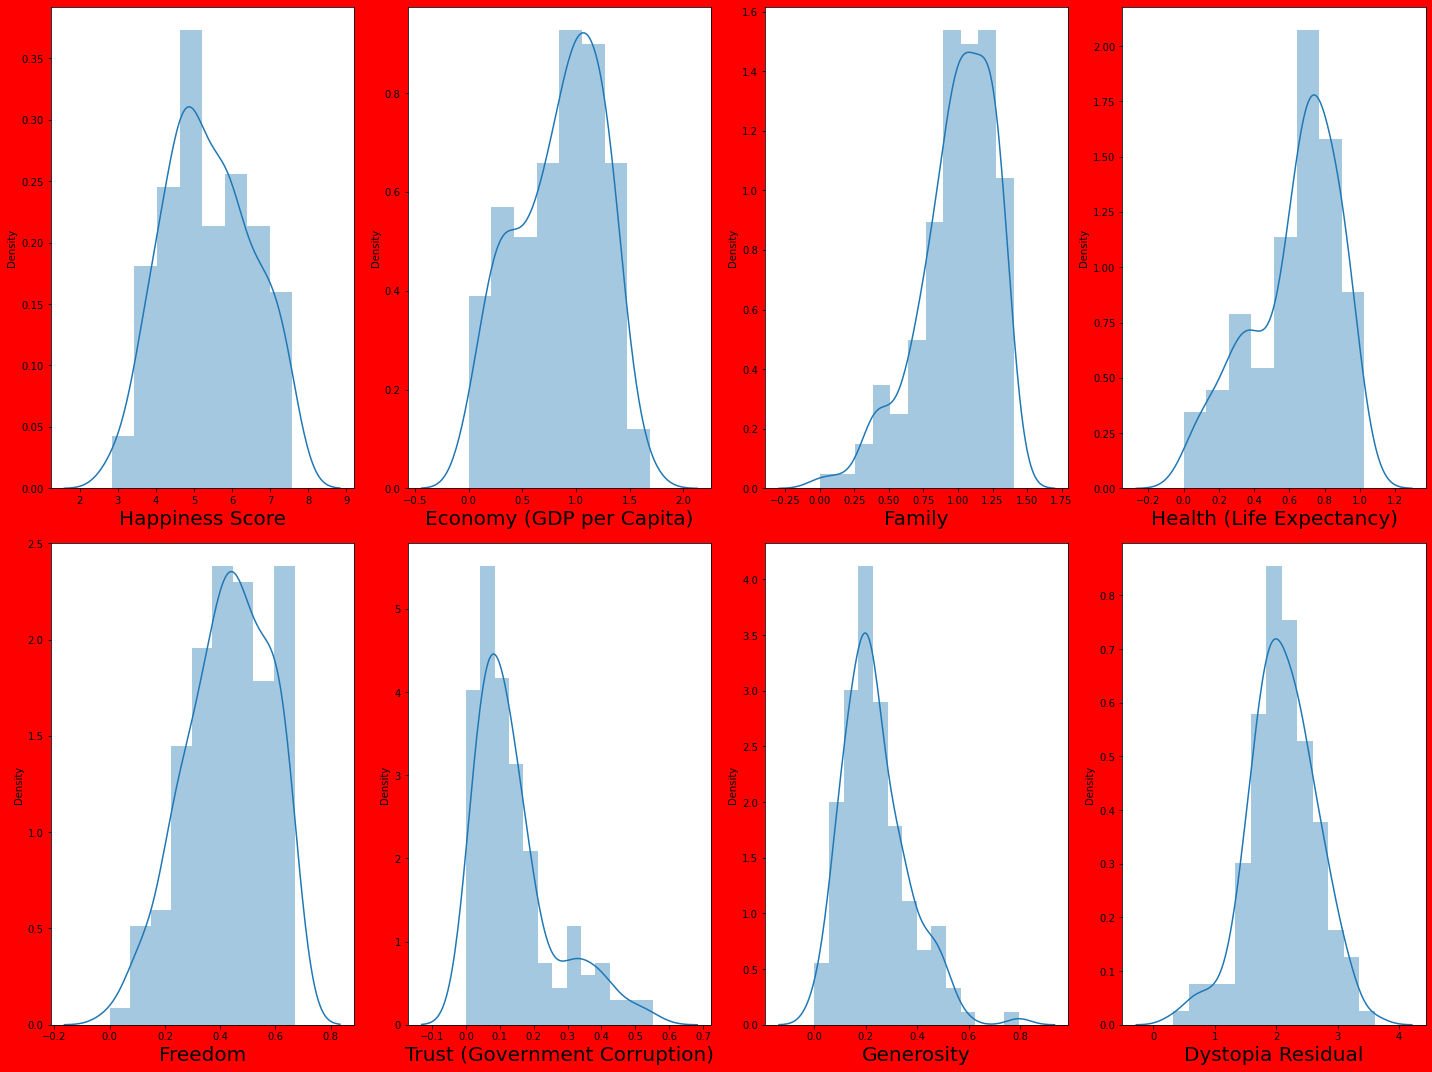

In [79]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [86]:
#divide dataset into feature and label
y = data['Happiness Score']
X = data.drop('Happiness Score', axis=1)
#x = data.drop(column=['Happiness Score'])


In [87]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [88]:
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


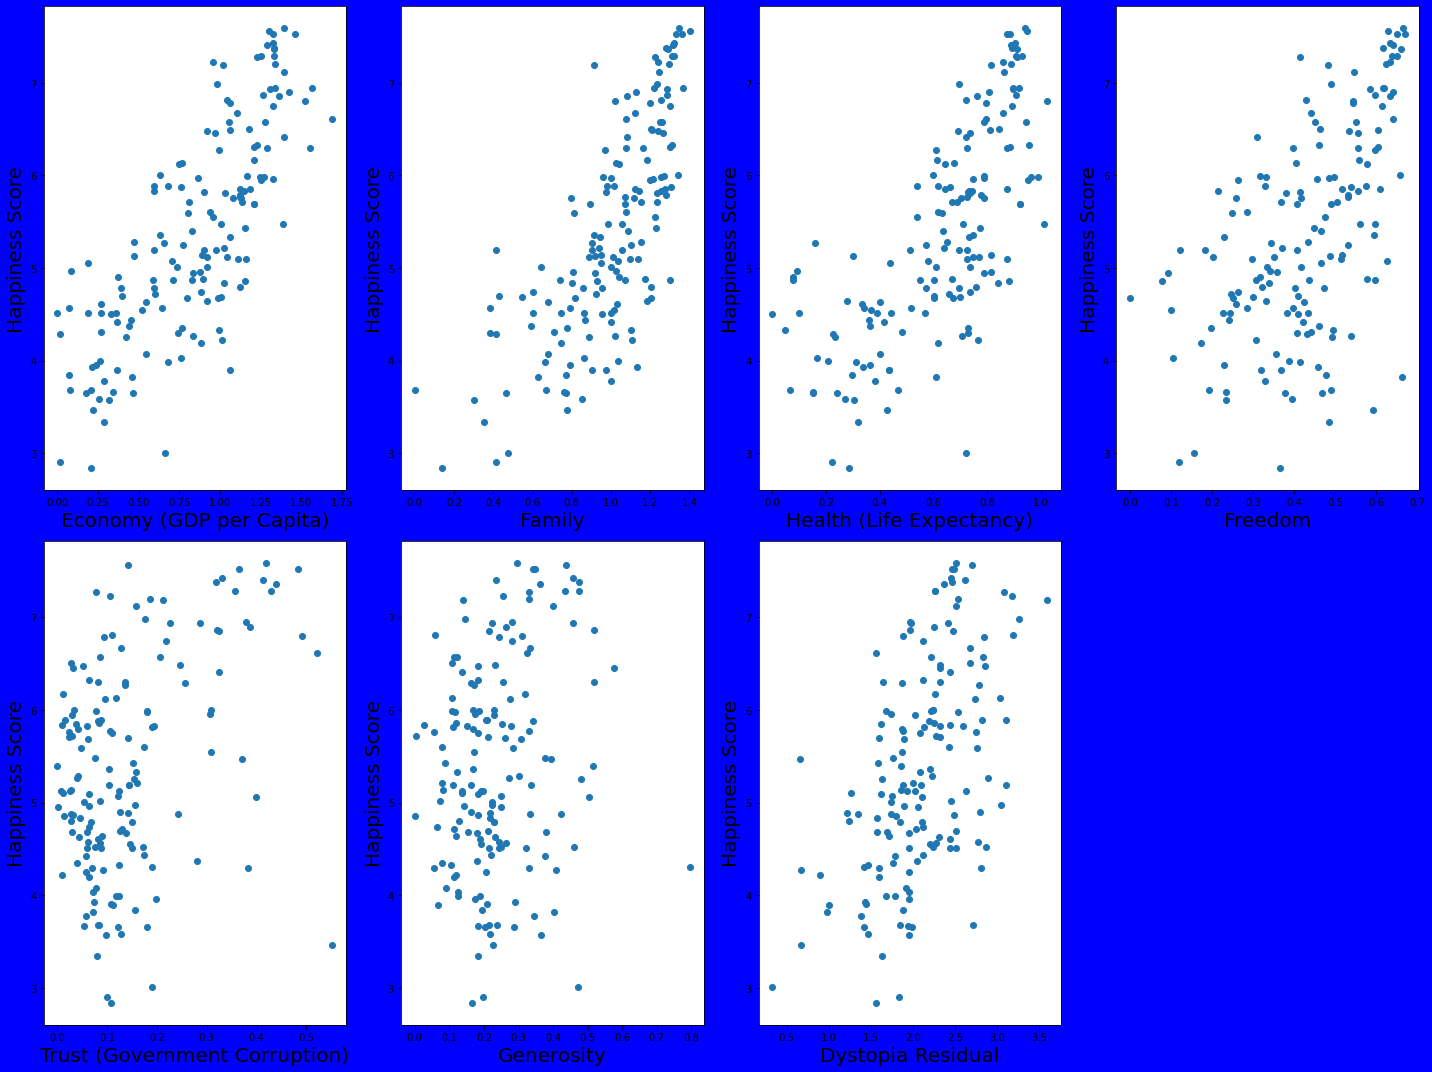

In [90]:
plt.figure(figsize=(20,15), facecolor='blue')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [91]:
#data scaling formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
X_scaled

array([[ 1.36962124,  1.32028142,  1.26340809, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 1.13522625,  1.51445776,  1.28943383, ..., -0.01647953,
         1.57585637,  1.09285682],
       [ 1.19286069,  1.36105403,  0.99222882, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [-0.45524543, -1.90108634,  0.37219907, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-2.06756644, -2.1184666 , -1.64964766, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [-1.58633379, -3.13472485, -1.40412871, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=499)
y_train.head()

107    4.715
145    3.781
93     4.971
91     5.013
101    4.857
Name: Happiness Score, dtype: float64

In [95]:
#model instatning and training
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [96]:
# predict the happiness score from features
data.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [98]:
#we have already fit the scaler,you can transform the data
print('Happiness Score : ',regression.predict(scaler.transform([[0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726]])))

Happiness Score :  [2.83902142]


# save the file for future prediction


In [101]:
# saving the model to the local file system
pickle.dump(regression, open('reg_model','wb'))

In [102]:
# predicting using the saved model
loaded_model = pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([[0.10686,0.11909,0.19449,0.31453,0.10000,0.11081,1.16438]]))

In [103]:
a

array([2.11021918])

In [104]:
scaler.transform([[0.10686,0.11909,0.19449,0.31453,0.10000,0.11081,1.16438]])

array([[-1.83971629, -3.21155563, -1.7693011 , -0.7594769 , -0.36289614,
        -1.00160045, -1.69373828]])

In [105]:
# adjusted r2 score
regression.score(x_train,y_train)

0.9999999398600368

In [106]:
#check how well  model to fit data...
regression.score(x_test,y_test)

0.9999999422370229

# ploting and visualization

In [107]:
y_pred = regression.predict(x_test)

In [108]:
y_pred

array([5.83264162, 4.57146762, 5.14042558, 5.84760027, 2.90464187,
       3.99478737, 5.25275312, 6.32888381, 6.85288952, 7.19974561,
       5.85517233, 4.51784091, 4.83923305, 5.97523073, 6.12275888,
       7.36354819, 7.28591646, 4.78793931, 7.4267968 , 5.9870302 ,
       6.16762904, 6.98254714, 4.35003067, 5.95959946, 5.26794572,
       5.98374613, 5.07324992, 3.84501468, 7.28390475, 5.47372362,
       4.79954922, 5.00702702, 4.51706284, 4.67732879, 5.3324866 ,
       7.56079014, 4.60971027, 3.65505421, 6.41111116, 4.51232329])

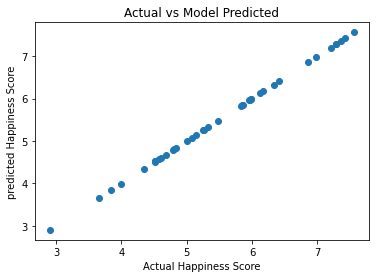

In [109]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('predicted Happiness Score')
plt.title('Actual vs Model Predicted')
plt.show()